<a href="https://colab.research.google.com/github/MuhammadHassan667410/Learning-Complete-Artificial-Intelligence/blob/main/Phase%203%20%3A%20Explainable%20AI/Shap_Explainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries

In [ ]:

import shap
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Spliting data

In [ ]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Traing the model

In [ ]:
model = xgb.XGBRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE: 0.4717943691423984


# Importing and training shap explainer and ploting summary and waterfall plot(for 1st prediction)

100%|===================| 4109/4128 [00:32<00:00]       

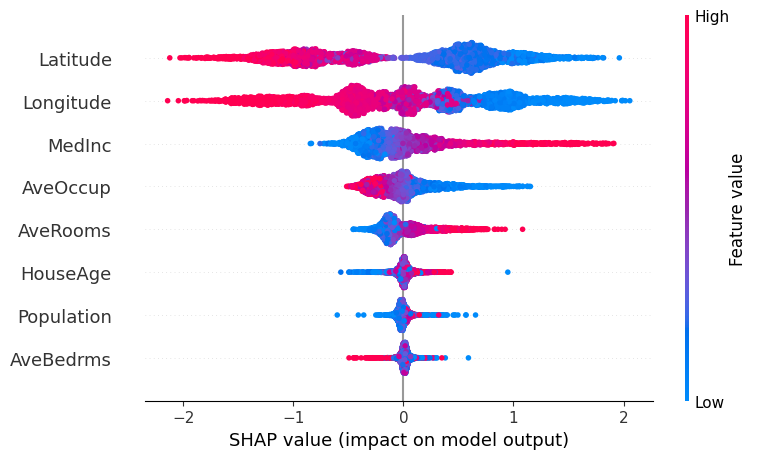

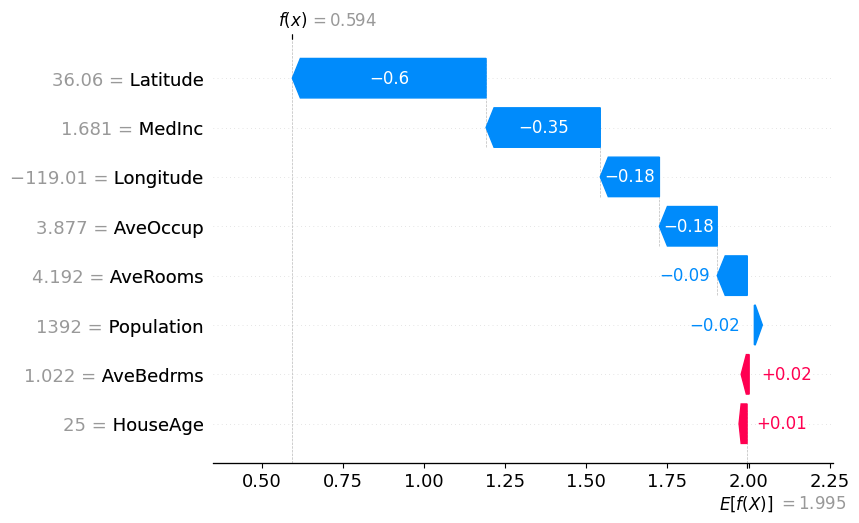

In [ ]:
explainer = shap.TreeExplainer(model, X_train)
shap_values = explainer(X_test)

# Global feature importance
shap.summary_plot(shap_values, X_test)

# Local explanation for a single prediction
shap.plots.waterfall(shap_values[0])

# Bar plot

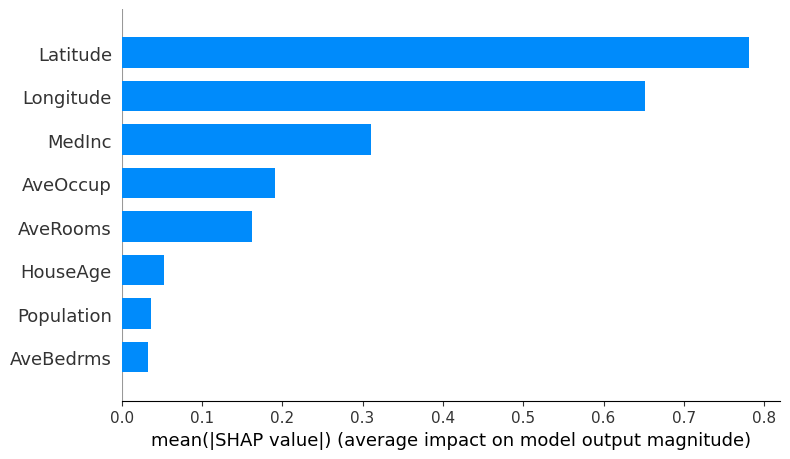

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


# Dependence plot

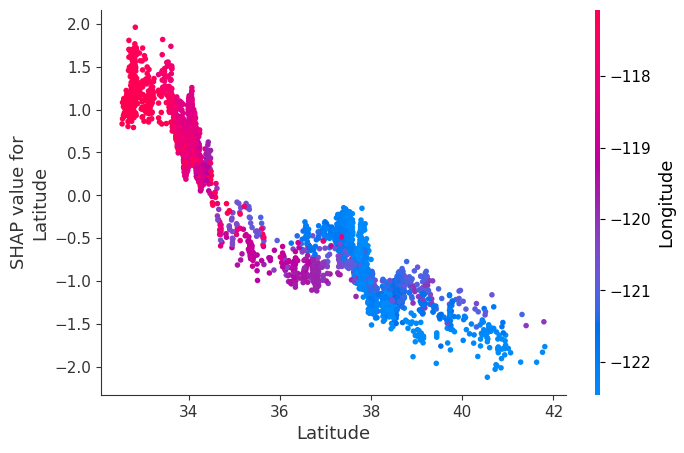

In [ ]:
shap.dependence_plot("Latitude", shap_values.values, X_test)

# Force plot

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])


# Decision plot

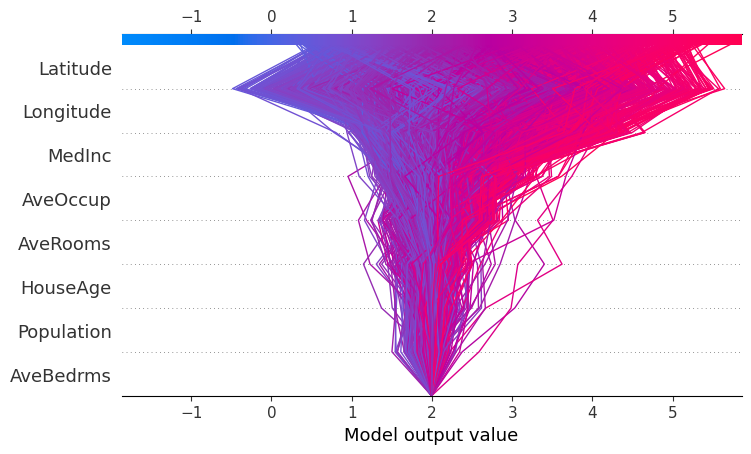

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values.values, X_test, ignore_warnings=True)

# Heatmap

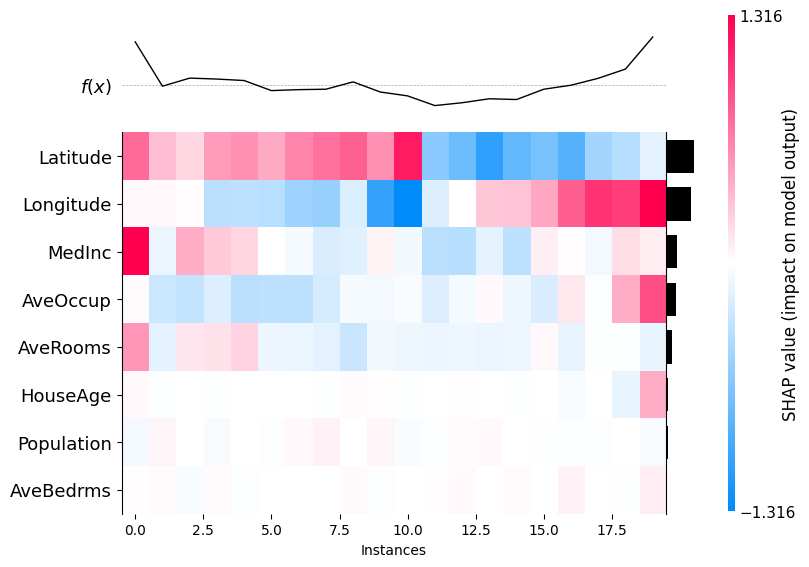

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.heatmap(shap_values[:20])
